### Getting familiar with iPython notebook

In [1]:
print("hello world")

hello world


In [2]:
########################################
#                   1                  #
########################################

# Load the boston dataset included with sklearn

##### Start solution code #####
from sklearn import datasets
dataset = datasets.load_boston()
##### End solution code #####

In [3]:
########################################
#                   2                  #
########################################

# Run this cell to see what it does.
# Then modify the code to print both the description and the data point.

dataset.DESCR
dataset.data[0]

##### Start solution code #####
print(dataset.DESCR)
print(dataset.data[0])
##### end solution code

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

### Loading the data

In [4]:
# Make plots appear inline rather than in a separate window
# no-import-all prevents importing * from numpy and matplotlib
%pylab inline --no-import-all

# Import some useful libraries
import scipy
import numpy as np
import pandas as pd
import seaborn as sns # Importing seaborn automatically makes our plots look better
import matplotlib.pyplot as pyplt
%matplotlib inline

Populating the interactive namespace from numpy and matplotlib


### Using Pandas

In [6]:
df = pd.read_csv("candy_choices.csv")
df.count()

gender         173
candy          174
flavor          52
age            169
ethnicity      174
shirt color    174
dtype: int64

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 174 entries, 0 to 173
Data columns (total 6 columns):
gender         173 non-null object
candy          174 non-null object
flavor         52 non-null object
age            169 non-null float64
ethnicity      174 non-null object
shirt color    174 non-null object
dtypes: float64(1), object(5)
memory usage: 8.2+ KB


In [15]:
df[['candy','age']].head()

,candy,age
0,reeses,26.0
1,kitkat,32.0
2,airhead,26.0
3,starburst,26.0
4,reeses,31.0


First Row:

In [16]:
df.iloc[0,:]

gender              M
candy          reeses
flavor            NaN
age                26
ethnicity       white
shirt color       red
Name: 0, dtype: object

First element of first column

In [17]:
df.iloc[0,0]

'M'

In [18]:
data=df

Drop NaN

In [29]:
data=df.dropna

Renames columns

In [24]:
data.columns=['Gender','Candy','Flavor','Age','Ethnicity','Shirt Color']

In [25]:
data.iloc[0,:]

Gender              M
Candy          reeses
Flavor            NaN
Age                26
Ethnicity       white
Shirt Color       red
Name: 0, dtype: object

In [28]:
data[data['Age']>20].head()

,Gender,Candy,Flavor,Age,Ethnicity,Shirt Color
0,M,reeses,NaN,26.0,white,red
1,M,kitkat,NaN,32.0,black,green
2,F,airhead,double mystery,26.0,mixed,white
3,M,starburst,red,26.0,white,red
4,F,reeses,NaN,31.0,white,black


In [37]:
# Each event will contain a tuple (selection index, selection, time since previous selection)
event_list = [] 

i = 0
time_since_last = {} 

for item in df["candy"].values:
    if item in time_since_last:
        event_list.append((i, item, time_since_last[item]))
    
    for e in time_since_last.keys():
        time_since_last[e]+=1
            
    time_since_last[item] = 0
    i += 1

In [38]:
event_list[:10]

[(4, 'reeses', 3),
 (5, 'starburst', 1),
 (7, 'airhead', 4),
 (8, 'starburst', 2),
 (9, 'reeses', 4),
 (11, 'kitkat', 9),
 (12, 'airhead', 4),
 (13, 'kitkat', 1),
 (14, 'kitkat', 0),
 (15, 'kitkat', 0)]

### Plots of interselection times

In [39]:
def plot_interselection_time(events, color, candy_name):
    # Pull out the interselection times for the appropriate candy
    candy = [] 
    for (i, choice, time) in events:
        if choice == candy_name:
            candy.append(time)
            
    # Plot the interselection times
    plt.plot(range(len(candy)), candy, color=color, label=candy_name)
    
    # Add a legend and label the axes
    plt.legend(frameon=True, shadow=True, framealpha=0.7, loc=0, prop={'size':14})
    plt.xlabel("Selection number", fontsize=14)
    plt.ylabel("Interselection time", fontsize=14)

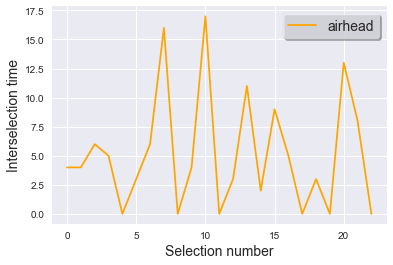

In [40]:
plot_interselection_time(event_list, "orange", "airhead")

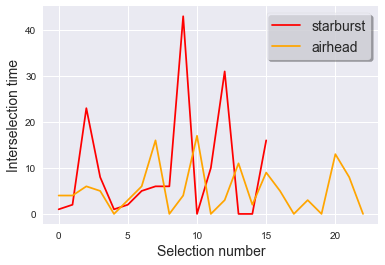

In [41]:
plot_interselection_time(event_list, "red", "starburst")
plot_interselection_time(event_list, "orange", "airhead")

In [42]:
########################################
#                   3                  #
########################################

# Modify this function so that a 5 on the x-axis corresponds to
# the 5th time any candy was chosen

def plot_interselection_time_scaled(events, color, candy_name):
    # Pull out the interselection times for the appropriate candy
    candy = [] 
    for (i, choice, time) in events:
        if choice == candy_name:
            candy.append(time)
            
    # Plot the interselection times
    plt.plot(range(len(candy)), candy, color=color, label=candy_name)
    
    # Add a legend and label the axes
    plt.legend(frameon=True, shadow=True, framealpha=0.7, loc=0, prop={'size':14})
    plt.xlabel("Selection number", fontsize=14)
    plt.ylabel("Interselection time", fontsize=14)
    
    
##### Start solution code #####
def plot_interselection_time_scaled(events, color, candy_name):
    # Pull out the interselection times for the appropriate candy
    candy = [] 
    selection_numbers = []
    for (i, choice, time) in events:
        if choice == candy_name:
            candy.append(time)
            selection_numbers.append(i)
            
    # Plot the interselection times
    plt.plot(selection_numbers, candy, color=color, label=candy_name)
    
    # Add a legend and label the axes
    plt.legend(frameon=True, shadow=True, framealpha=0.7, loc=0, prop={'size':14})
    plt.xlabel("Selection number", fontsize=14)
    plt.ylabel("Interselection time", fontsize=14)
##### End solution code

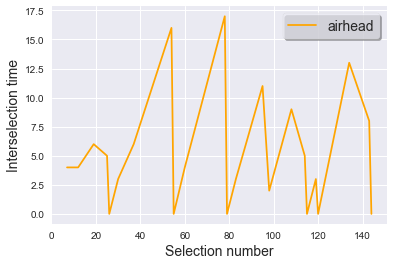

In [43]:
plot_interselection_time_scaled(event_list, "orange", "airhead")

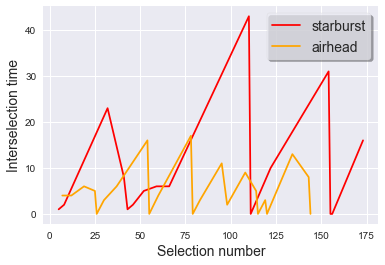

In [44]:
plot_interselection_time_scaled(event_list, "red", "starburst")
plot_interselection_time_scaled(event_list, "orange", "airhead")

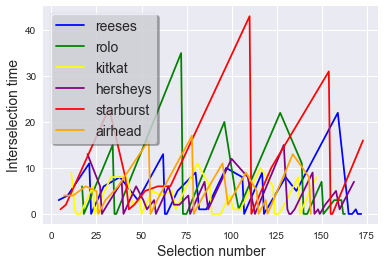

In [45]:
plot_interselection_time_scaled(event_list, "blue", "reeses")
plot_interselection_time_scaled(event_list, "green", "rolo")
plot_interselection_time_scaled(event_list, "yellow", "kitkat")
plot_interselection_time_scaled(event_list, "purple", "hersheys")
plot_interselection_time_scaled(event_list, "red", "starburst")
plot_interselection_time_scaled(event_list, "orange", "airhead")

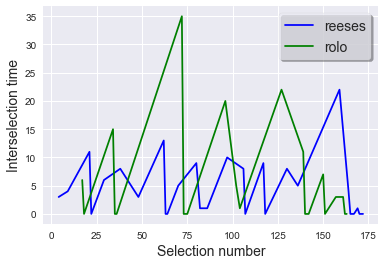

In [46]:
plot_interselection_time_scaled(event_list, "blue", "reeses")
plot_interselection_time_scaled(event_list, "green", "rolo")

### Build training points

In [47]:
# Each sharedStateEvent will be a map from all candy types to the time since that candy was selected
shared_state_events = [{"airhead":0, "starburst":0, "hersheys":0, "reeses":0, "kitkat":0, "rolo":0}]


import copy

i = 0
time_since_last = {}
for item in df["candy"].values:
    if not item in time_since_last:
        time_since_last[item] = 0
    
    event_list.append((i, item, time_since_last[item]))
    
    curr_shared_event = copy.deepcopy(shared_state_events[-1])
    curr_shared_event[item] = time_since_last[item]
    shared_state_events.append(curr_shared_event)
    
    time_since_last[item] = 0
    
    for e in time_since_last.keys():
        if e!=item:
            time_since_last[e]+=1
        
    i = i+1

In [50]:
events_frame = pd.DataFrame(shared_state_events)

In [52]:
events_frame.head()

,airhead,hersheys,kitkat,reeses,rolo,starburst
0,0,0,0,0,0,0
1,0,0,0,0,0,0
2,0,0,0,0,0,0
3,0,0,0,0,0,0
4,0,0,0,0,0,0


In [53]:
events_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175 entries, 0 to 174
Data columns (total 6 columns):
airhead      175 non-null int64
hersheys     175 non-null int64
kitkat       175 non-null int64
reeses       175 non-null int64
rolo         175 non-null int64
starburst    175 non-null int64
dtypes: int64(6)
memory usage: 8.3 KB


In [54]:
# Set a random seed so we will get the same results each time
import random
random.seed(5656)

# Randomly select 30 events for our test set
test_indices = set(random.sample(range(events_frame.shape[0]), 30))

# Split our data into training and test data
train_features = []
train_labels = []
test_features = []
test_labels = []

i = 0
for airhead, hersheys, kitkat, reeses, rolo, starburst in events_frame.values:
    if i in test_indices:
        # Use starburst as our label, and all others as our features
        test_features.append([airhead, hersheys, kitkat, reeses, rolo])
        test_labels.append(starburst)
    else:
        train_features.append([airhead, hersheys, kitkat, reeses, rolo])
        train_labels.append(starburst)
    
    i += 1

### Linear regression model with all features

In [55]:
import sklearn
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
model = linear_model.LinearRegression()
model.fit(train_features, train_labels)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [56]:
# See which features had the most influence on our model 
zip(events_frame.columns, model.coef_)

In [57]:
# Print mean squared error and R^2 on the training set
print(numpy.mean((model.predict(train_features) - train_labels) ** 2))
print(model.score(train_features, train_labels))

41.5985124919
0.0577530174629


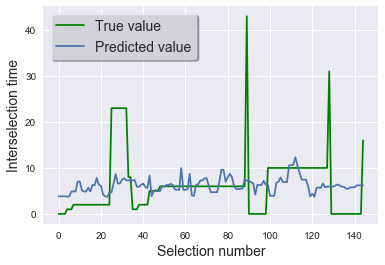

In [58]:
# Plot predicted and true interarrival times on the training set

plt.plot(train_labels, color="green", label="True value")
plt.plot(model.predict(train_features), label="Predicted value")

plt.xlabel("Selection number", fontsize=14)
plt.ylabel("Interselection time", fontsize=14)
plt.legend(frameon=True, shadow=True, framealpha=0.7, loc=0, prop={"size": 14})

In [59]:
# Print mean squared error and R^2 on the test set
print(numpy.mean((model.predict(test_features) - test_labels) ** 2))
print(model.score(test_features, test_labels))

19.5789288047
0.0841933410829


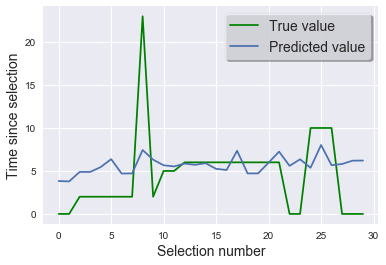

In [60]:
# Plot predicted and true time since selection on the test set 

plt.plot(test_labels, color="green", label="True value")
plt.plot(model.predict(test_features), label="Predicted value")

plt.xlabel("Selection number", fontsize=14)
plt.ylabel("Time since selection", fontsize=14)
plt.legend(frameon=True, shadow=True, framealpha=0.7, loc=0, prop={"size": 14})

### Model performance with restricted features

In [61]:
# Restrict the features to just Airhead and Kitkat - the two most influential features

train_features_res = [[e[0], e[2]] for e in train_features]
train_labels_res = train_labels
test_features_res = [[e[0], e[2]] for e in test_features]
test_labels_res = test_labels
model_res = linear_model.LinearRegression()
model_res.fit(train_features_res, train_labels_res)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

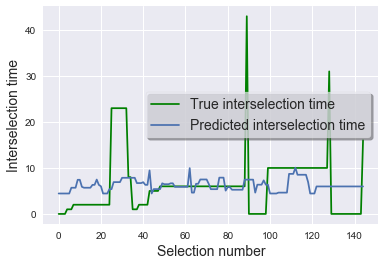

In [62]:
# Plot predicted and true interarrival times on the training set

plt.plot(train_labels_res, color="green", label="True interselection time")
plt.plot(model_res.predict(train_features_res), label="Predicted interselection time")

plt.xlabel("Selection number", fontsize=14)
plt.ylabel("Interselection time", fontsize=14)
plt.legend(frameon=True, shadow=True, framealpha=0.7, loc=0, prop={"size": 14})

In [63]:
# Print the mean squared error and R^2 of the restricted model on the training set

print(numpy.mean((model_res.predict(train_features_res) - train_labels_res) ** 2))
print(model_res.score(train_features_res, train_labels_res))

42.5734517359
0.035669690302


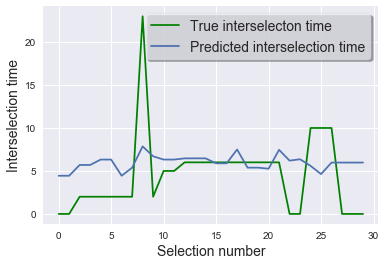

In [64]:
# Plot predicted and true interarrival times on the test set

plt.plot(test_labels_res, color="green", label="True interselecton time")
plt.plot(model_res.predict(test_features_res), label="Predicted interselection time")

plt.xlabel("Selection number", fontsize=14)
plt.ylabel("Interselection time", fontsize=14)
plt.legend(frameon=True, shadow=True, framealpha=0.7, loc=0, prop={"size": 14})

In [65]:
# Print the mean squared error and R^2 of the restricted model on the test set

print(numpy.mean((model_res.predict(test_features_res) - test_labels_res) ** 2))
print(model_res.score(test_features_res, test_labels_res))

21.1088658473
0.0126303589977
